In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
%matplotlib inline
plt.style.use("seaborn-pastel")

In [90]:
stocks = pd.read_csv("data/stocks.csv", header=[0,1], index_col=[0], parse_dates=[0])


In [91]:
tickers = ["AAPL", "AMZN", "GOOG", "TSLA"]
close = stocks.loc[:, "Close"].copy()
close

,AAPL,AMZN,GOOG,MSFT,NAQ.BE,SHEL,TSLA
Date,,,,,,,
2013-01-02,19.608213,12.865500,18.013729,27.620001,5.958333,69.230003,2.357333
2013-01-03,19.360714,12.924000,18.024191,27.250000,6.135000,69.000000,2.318000
2013-01-04,18.821428,12.957500,18.380356,26.740000,6.133333,69.379997,2.293333
2013-01-07,18.710714,13.423000,18.300158,26.690001,6.361666,68.989998,2.289333
2013-01-08,18.761070,13.319000,18.264042,26.549999,6.293333,68.839996,2.245333
...,...,...,...,...,...,...,...
2022-12-23,131.860001,85.250000,89.809998,238.729996,57.689999,57.779999,123.150002
2022-12-27,130.029999,83.040001,87.930000,236.960007,57.160000,57.869999,109.099998
2022-12-28,126.040001,81.820000,86.459999,234.529999,57.509998,56.560001,112.709999


In [92]:
normclose = close.div(close.iloc[0]).mul(100)

In [93]:
normclose

,AAPL,AMZN,GOOG,MSFT,NAQ.BE,SHEL,TSLA
Date,,,,,,,
2013-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2013-01-03,98.737777,100.454699,100.058077,98.660388,102.965044,99.667769,98.331467
2013-01-04,95.987472,100.715091,102.035263,96.813899,102.937066,100.216660,97.285072
2013-01-07,95.422841,104.333293,101.590056,96.632874,106.769229,99.653322,97.115391
2013-01-08,95.679651,103.524929,101.389567,96.125990,105.622379,99.436650,95.248868
...,...,...,...,...,...,...,...
2022-12-23,672.473304,662.624826,498.564162,864.337395,968.223805,83.460922,5224.124229
2022-12-27,663.140471,645.447111,488.127693,857.929035,959.328720,83.590923,4628.111558
2022-12-28,642.791866,635.964376,479.967244,849.131034,965.202821,81.698684,4781.250749


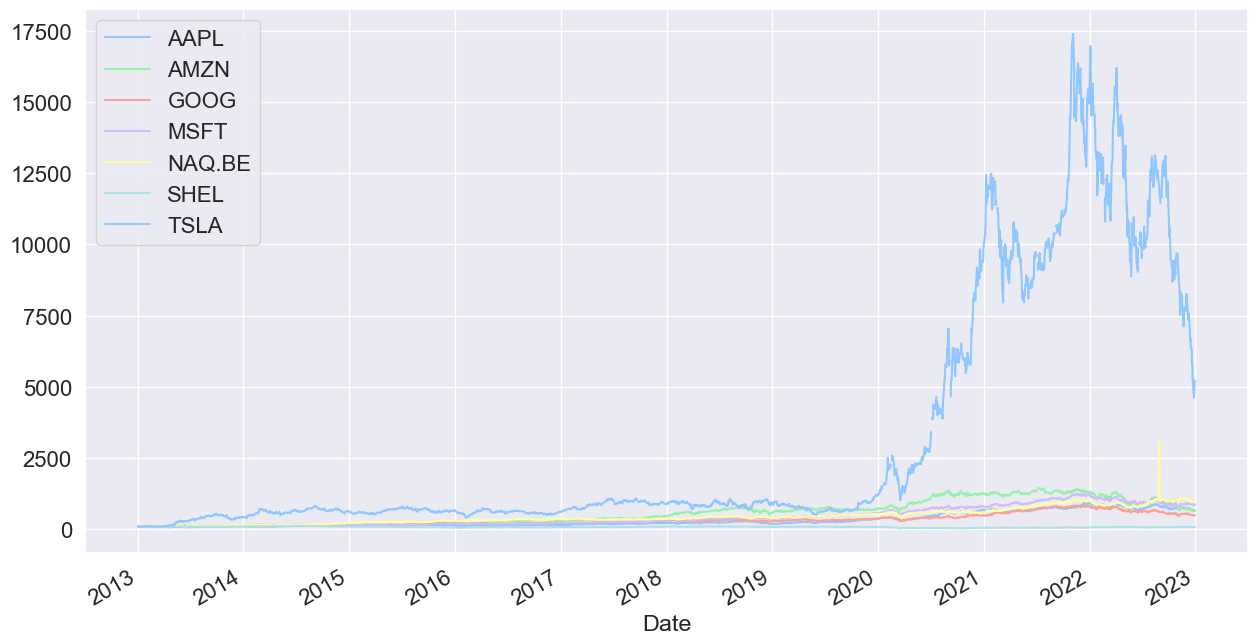

In [94]:
normclose.plot(figsize = (15,8), fontsize= 16)
plt.legend(fontsize = 16)
plt.show()

In [95]:
ret = close.pct_change().dropna()


In [96]:
impSum = ret.describe().T.loc[:, ["mean", "std"]]
impSum

,mean,std
AAPL,0.000897,0.018092
AMZN,0.000933,0.020291
GOOG,0.000760,0.016870
MSFT,0.000980,0.016832
NAQ.BE,0.001712,0.049320
SHEL,0.000108,0.019105
TSLA,0.002163,0.035579


In [97]:
impSum['mean'] = impSum['mean']*252
impSum['std']  = impSum['std']*np.sqrt(252)

In [98]:
impSum

,mean,std
AAPL,0.226087,0.287202
AMZN,0.235048,0.322110
GOOG,0.191441,0.267802
MSFT,0.246901,0.267204
NAQ.BE,0.431501,0.782936
SHEL,0.027251,0.303276
TSLA,0.545099,0.564797


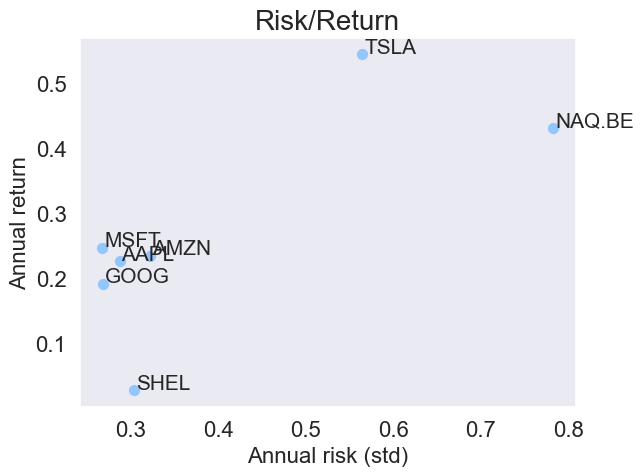

In [99]:
impSum.plot.scatter(x="std", y="mean", s= 50, fontsize= 16)
plt.grid()
plt.xlabel("Annual risk (std)", fontsize=16)
plt.ylabel("Annual return", fontsize=16)
plt.title("Risk/Return", fontsize = 20)
for i in impSum.index:
    plt.annotate(i, xy=(impSum.loc[i, "std"]+0.002, impSum.loc[i, "mean"]+0.002), size=15 )

#### Annual risk/return graph intepretation 
- TSLA: High risk, high return,
- If choosing between AAPL and AMZN, both are at similar risk, but AMZN has higher return. Hence, it will more likely be better to chooose AMZN.
- We take at face value that the tech giants are low risk compared to other companies.

In [100]:
ret

,AAPL,AMZN,GOOG,MSFT,NAQ.BE,SHEL,TSLA
Date,,,,,,,
2013-01-03,-0.012622,0.004547,0.000581,-0.013396,0.029650,-0.003322,-0.016685
2013-01-04,-0.027855,0.002592,0.019760,-0.018716,-0.000272,0.005507,-0.010642
2013-01-07,-0.005882,0.035925,-0.004363,-0.001870,0.037228,-0.005621,-0.001744
2013-01-08,0.002691,-0.007748,-0.001974,-0.005245,-0.010741,-0.002174,-0.019220
2013-01-09,-0.015629,-0.000113,0.006573,0.005650,-0.001589,-0.005375,-0.001187
...,...,...,...,...,...,...,...
2022-12-23,-0.002798,0.017425,0.017562,0.002267,0.010687,0.018329,-0.017551
2022-12-27,-0.013878,-0.025924,-0.020933,-0.007414,-0.009187,0.001558,-0.114089
2022-12-28,-0.030685,-0.014692,-0.016718,-0.010255,0.006123,-0.022637,0.033089


In [101]:
#covariance and correlarion coefficient
cov = ret.cov()
corr = ret.corr()

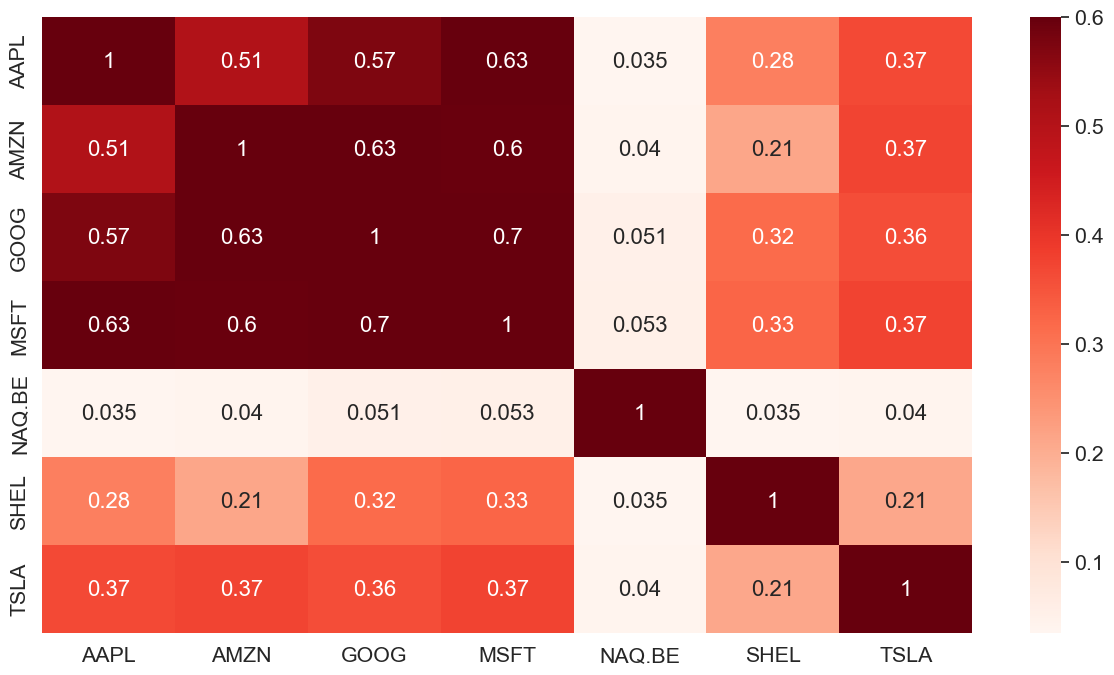

In [102]:
plt.figure(figsize = (15,8))
sns.set(font_scale=1.4)
sns.heatmap(corr, cmap = "Reds", annot= True, annot_kws={"size" : 16}, vmax = 0.6) 
plt.show()

In [103]:
closing = stocks.loc[:, "Close"].copy()
closing

,AAPL,AMZN,GOOG,MSFT,NAQ.BE,SHEL,TSLA
Date,,,,,,,
2013-01-02,19.608213,12.865500,18.013729,27.620001,5.958333,69.230003,2.357333
2013-01-03,19.360714,12.924000,18.024191,27.250000,6.135000,69.000000,2.318000
2013-01-04,18.821428,12.957500,18.380356,26.740000,6.133333,69.379997,2.293333
2013-01-07,18.710714,13.423000,18.300158,26.690001,6.361666,68.989998,2.289333
2013-01-08,18.761070,13.319000,18.264042,26.549999,6.293333,68.839996,2.245333
...,...,...,...,...,...,...,...
2022-12-23,131.860001,85.250000,89.809998,238.729996,57.689999,57.779999,123.150002
2022-12-27,130.029999,83.040001,87.930000,236.960007,57.160000,57.869999,109.099998
2022-12-28,126.040001,81.820000,86.459999,234.529999,57.509998,56.560001,112.709999


In [104]:
closing_roll = closing.rolling(window = 18).mean()
closing_roll

,AAPL,AMZN,GOOG,MSFT,NAQ.BE,SHEL,TSLA
Date,,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2022-12-23,140.435000,89.454444,94.266110,247.850555,60.596667,56.791667,163.348334
2022-12-27,139.435000,88.704444,93.514999,246.840555,60.163333,56.758333,158.592778
2022-12-28,138.197778,87.944444,92.691666,245.720555,59.735000,56.675556,154.037778
